In [1]:
import nltk
from nltk import Text, sent_tokenize, word_tokenize, RegexpTokenizer

In [2]:
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sleep = open('/home/amn34/metis/stuff/noirs/chandler/39_rc_bigsleep.txt').read()

In [5]:
sleep = sleep.decode('utf-8')

In [6]:
sleep = sleep.lower()

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

In [8]:
sleepwordsorig = tokenizer.tokenize(sleep)

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.append('said')

In [10]:
sleepstop = [w for w in sleepwordsorig if not w in stop]

In [11]:
print len(sleepstop)/float(len(sleepwordsorig))

0.460562129747


In [12]:
print 'proportional number of stopwords pages:', 277*31642/68703

proportional number of stopwords pages: 127


In [13]:
sent = pd.read_pickle('sentiment.pkl')

In [14]:
#sent.fillna(0, inplace=True)

In [15]:
#sent.sentiment.replace({'negative':-1,'positive':1}, inplace=True)

In [16]:
#sent['word'] = sent['word'].values.astype('unicode')

In [17]:
#sent.to_pickle('sentiment.pkl')

In [18]:
sleepwords = pd.DataFrame(columns=['word'])

In [19]:
sleepwords.word = sleepstop

In [20]:
sleepsentiment = pd.merge(sleepwords, sent, how='left', on='word')

In [21]:
sleepsentiment['index'] = sleepsentiment.index

In [22]:
sleepsentiment.head()

,word,emotion,sentiment,index
0,eleven,NaN,NaN,0
1,clock,anticipation,0.0,1
2,morning,NaN,NaN,2
3,mid,0,0.0,3
4,october,NaN,NaN,4


In [23]:
len(sleepstop)/127.0

249.1496062992126

In [24]:
import numpy as np

In [25]:
sleepsentiment.fillna(0,inplace=True)

In [26]:
sample = sleepsentiment[0:1000]

In [27]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

In [28]:
pagesent = []

for i in chunker(sleepsentiment,150):
    pagesent.append(sum(i.sentiment))

In [29]:
len(pagesent)

211

<Container object of 211 artists>

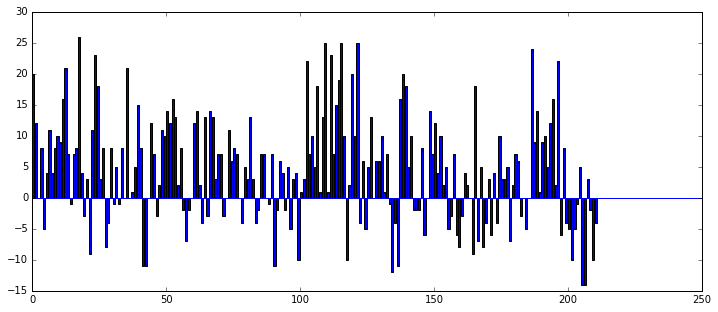

In [30]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pagesent)),pagesent)

In [31]:
words = word_tokenize(sleep)

In [32]:
sentences = sent_tokenize(sleep)

In [33]:
print len(sentences), len(words), len(words)/float(len(sentences))

6591 81341 12.3412228797


In [34]:
ss = sleepsentiment.sentiment.values

In [35]:
from collections import Counter

In [36]:
Counter(ss)

Counter({-1.0: 3828, 0.0: 23048, 1.0: 4766})

In [37]:
pospage = []
negpage = []

for i in chunker(sleepsentiment,150):
    postemp = 0
    negtemp = 0
    for j in i.sentiment.values:
        if j == 1.0:
            postemp += 1
        elif j == -1.0:
            negtemp -= 1
    pospage.append(postemp)
    negpage.append(negtemp)

In [38]:
len(pospage)

211

<Container object of 211 artists>

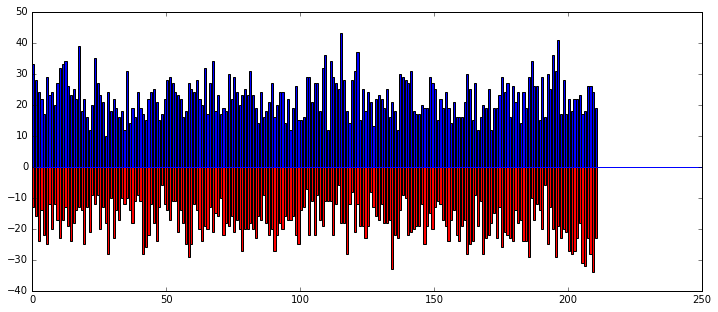

In [39]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(pospage)),pospage)
plt.bar(range(len(negpage)), negpage, color='r')

In [40]:
pagesent = map(int,pagesent)

In [57]:
len(pagesent)

211

In [ ]:
import scipy.fftpack

In [107]:
N = 211
x = np.linspace(0,212,N)
y = np.asarray(pagesent)

w = scipy.fftpack.rfft(y)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
#spectrum = w**2

#cutoff_idx = spectrum > (spectrum.max()/3)
w2 = w.copy()
w2[(f<.2)] = 0

y2 = scipy.fftpack.irfft(w2)

In [109]:
w2[(f<.2)]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

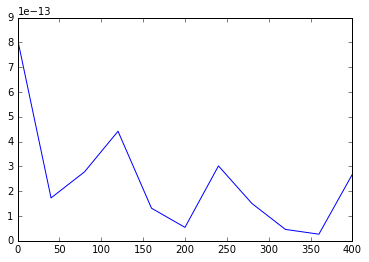

In [56]:
# Number of samplepoints
N = 22
# sample spacing
T = 1.0 / 800.0
x = np.asarray(pagesent)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N/2]))
plt.show()

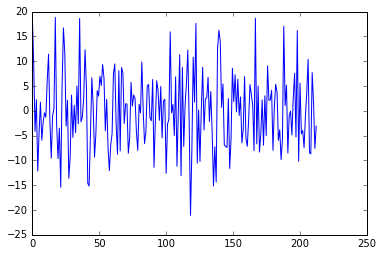

In [105]:
plt.plot(x,y2)

In [42]:
woman = [u'she',u'her',u'girl']
womancount = []
for i in chunker(sleepwordsorig,250):
    womantmp = 0
    for word in i:
        if word in woman:
            womantmp+=1
    womancount.append(womantmp)

<Container object of 275 artists>

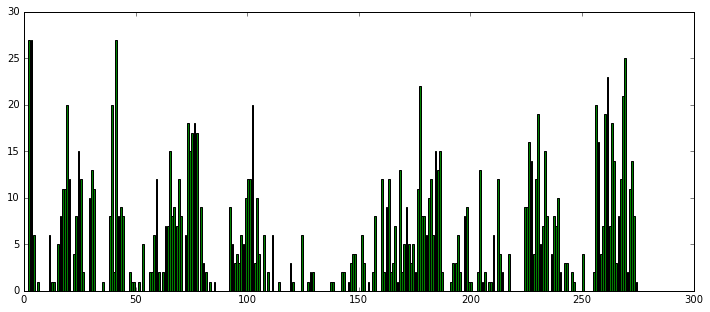

In [43]:
plt.figure(figsize=(12,5))
plt.bar(range(len(womancount)),womancount,color='g')

In [44]:
guncount = []
gun = ['gun','guns']
for i in chunker(sleepwordsorig,250):
    guntmp = 0
    for word in i:
        if word in gun:
            guntmp+=1
    guncount.append(guntmp)

<Container object of 275 artists>

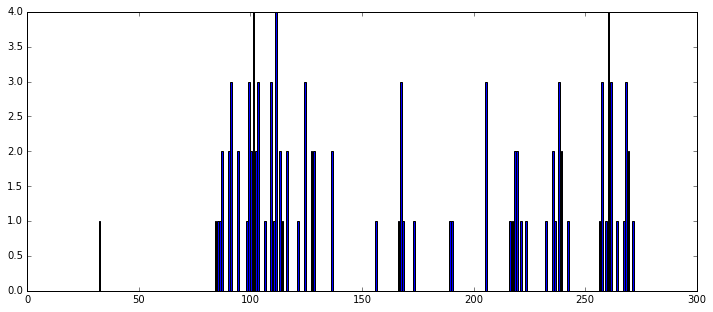

In [46]:
plt.figure(figsize=(12,5))
plt.axhline(y=0)
plt.bar(range(len(guncount)),guncount)

In [47]:
from scipy.interpolate import *

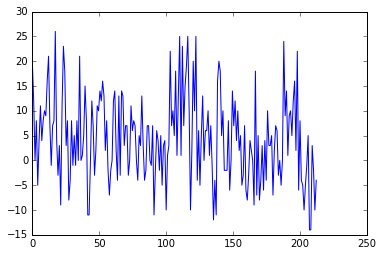

In [117]:
plt.plot(x,pagesent)

In [49]:
x=range(len(pagesent))

In [118]:
s = UnivariateSpline(x, pagesent)

In [122]:
xs=np.linspace(0,211,210)

In [123]:
s.set_smoothing_factor(.8)

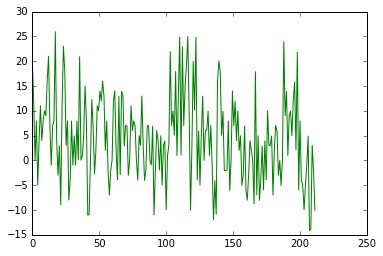

In [124]:
plt.plot(xs, s(xs), 'g')

In [126]:
x = np.array([13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
y = np.array([2.404070, 1.588134, 1.760112, 1.771360, 1.860087,
          1.955789, 1.910408, 1.655911, 1.778952, 2.624719,
          1.698099, 3.022607, 3.303135])
xx = np.arange(1,13.01,0.1)
s1 = InterpolatedUnivariateSpline (x, y)
s1rev = InterpolatedUnivariateSpline (x[::-1], y[::-1])
# Use a smallish value for s
s2 = inter.UnivariateSpline (x[::-1], y[::-1], s=0.1)
s2crazy = inter.UnivariateSpline (x[::-1], y[::-1], s=5e8)
plt.plot (x, y, 'bo', label='Data')
plt.plot (xx, s1(xx), 'k-', label='Spline, wrong order')
plt.plot (xx, s1rev(xx), 'k--', label='Spline, correct order')
plt.plot (xx, s2(xx), 'r-', label='Spline, fit')
# Uncomment to get the poor fit.
#plt.plot (xx, s2crazy(xx), 'r--', label='Spline, fit, s=5e8')
plt.minorticks_on()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'inter' is not defined